# Никита Сысоев
# Задание 1
### 1.1

Для классификации изображений я использовал сверточную сеть. Изображения маленькие, поэтому я не использовал предобученную сеть для выявления основных фич.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import regularizers
from keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

RND_SEED = 7
plt.style.use('ggplot')

np.random.seed(RND_SEED)

%matplotlib inline

Using TensorFlow backend.


In [2]:
clocks_dir = './Data/clock/'
crocodiles_dir = './Data/crocodile/'

#List of images as arrays
images = []
#List of tuples (Cl,Cr), where Cl and Cr are probabilities of the image to contain clocks or crocodile
classes = []

for img_name in os.listdir(clocks_dir):
    image = load_img(clocks_dir + img_name)
    image = img_to_array(image)
    images.append(image)
    classes.append([1,0])
    
for img_name in os.listdir(crocodiles_dir):
    image = load_img(crocodiles_dir + img_name)
    image = img_to_array(image)
    images.append(image)
    classes.append([0,1])

images = np.array(images, dtype=float) / 255.0
classes = np.array(classes)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images, classes, train_size=0.8, random_state=123)

Для лучшей работы сети изображения из обучающей выборки поворачиваются и отражаются по горизонтали

In [4]:
datagen = ImageDataGenerator(
        rotation_range=30,  # randomly rotates image
        horizontal_flip=True  # randomly flips image
)  
datagen.fit(X_train)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(40, activation="relu", kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=16), epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
50/50 [==============================] - 3s 51ms/step - loss: 0.9017 - acc: 0.5162 - val_loss: 0.7857 - val_acc: 0.5050
Epoch 2/100
50/50 [==============================] - 2s 34ms/step - loss: 0.7579 - acc: 0.5413 - val_loss: 0.7255 - val_acc: 0.5550
Epoch 3/100
50/50 [==============================] - 2s 41ms/step - loss: 0.6953 - acc: 0.5700 - val_loss: 0.6650 - val_acc: 0.8250
Epoch 4/100
50/50 [==============================] - 2s 33ms/step - loss: 0.6443 - acc: 0.6912 - val_loss: 0.5772 - val_acc: 0.7700
Epoch 5/100
50/50 [==============================] - 2s 30ms/step - loss: 0.5888 - acc: 0.7288 - val_loss: 0.4935 - val_acc: 0.8400
Epoch 6/100
50/50 [==============================] - 2s 34ms/step - loss: 0.5130 - acc: 0.7738 - val_loss: 0.4757 - val_acc: 0.7850
Epoch 7/100
50/50 [==============================] - 2s 36ms/step - loss: 0.5246 - acc: 0.7913 - val_loss: 0.6534 - val_acc: 0.6650
Epoch 8/100
50/50 [==============================] - 2s 36ms/step - loss: 0.

50/50 [==============================] - 2s 32ms/step - loss: 0.3030 - acc: 0.9087 - val_loss: 0.2587 - val_acc: 0.9100
Epoch 63/100
50/50 [==============================] - 1s 27ms/step - loss: 0.2768 - acc: 0.9163 - val_loss: 0.2370 - val_acc: 0.9350
Epoch 64/100
50/50 [==============================] - 1s 30ms/step - loss: 0.2695 - acc: 0.9200 - val_loss: 0.2469 - val_acc: 0.9150
Epoch 65/100
50/50 [==============================] - 2s 32ms/step - loss: 0.2804 - acc: 0.9075 - val_loss: 0.2608 - val_acc: 0.9250
Epoch 66/100
50/50 [==============================] - 2s 36ms/step - loss: 0.2731 - acc: 0.9287 - val_loss: 0.2465 - val_acc: 0.9350
Epoch 67/100
50/50 [==============================] - 1s 28ms/step - loss: 0.2602 - acc: 0.9213 - val_loss: 0.3201 - val_acc: 0.8850
Epoch 68/100
50/50 [==============================] - 2s 36ms/step - loss: 0.2614 - acc: 0.9188 - val_loss: 0.2478 - val_acc: 0.9350
Epoch 69/100
50/50 [==============================] - 1s 30ms/step - loss: 0.2524 

Качество измерялось с помощью **accuracy**. На тестовой выборке **accuracy=0.95** (результат варьируется +-0.02, т.к. выборка маленькая и случайное разбиение влияет на точность). При такой небольшой выборке и низком разрешении считаю, что результат хороший.

### 1.2
Для вывода изображений, похожих и на часы, и на крокодила, предскажем вероятность для обоих классов с помощью нашей модели и выведем 10 предложений с наибольшим произведением вероятностей (таким образом в топе оказываются предложения с большими вероятностями обоих классов)

In [7]:
#Predictions for all images
pred = model.predict(np.array(images))
#Sorting sentences by multiplication of probabilities (moving (1,1) to the top and (0,0) to the bottom)
sorted_by_uncert = [im for im,_ in sorted(zip(images, pred), key=lambda pair: pair[1][1] * pair[1][0], reverse=True)]

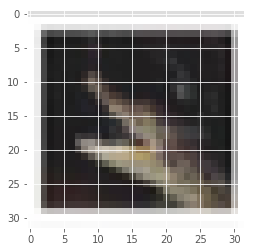

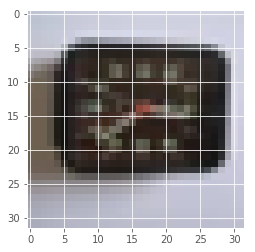

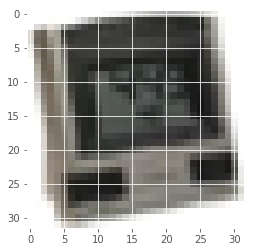

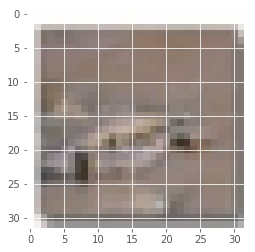

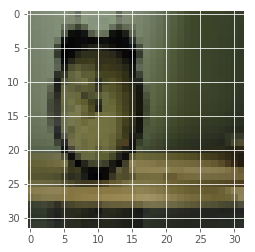

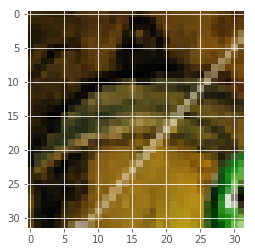

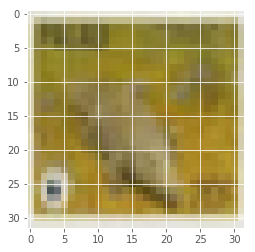

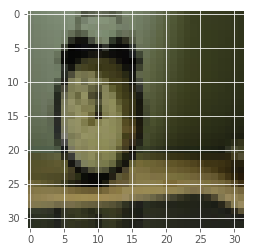

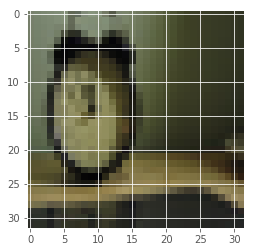

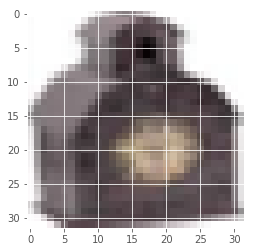

In [8]:
show_uncert = 10
for i in range(show_uncert):
    plt.imshow(sorted_by_uncert[i])
    plt.show()

Судя по всему открытая пасть крокодила часто оказывается похожа на стрелки часов. Круглый глаз крокодила также напоминает часы по форме.